In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets

iris_data = datasets.load_iris()


df = pd.DataFrame(data=np.hstack((iris_data.data, iris_data.target.reshape(-1, 1))), 
                  columns=["sepal_length","sepal_width","petal_length","petal_width", "species"])

df.species.replace({0.0: 'setosa', 1.0:'versicolor', 2.0:'virginica'}, inplace=True)

### Styling

In [ ]:
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

### histograms

Text(0.5, 0, 'Size (cm)')

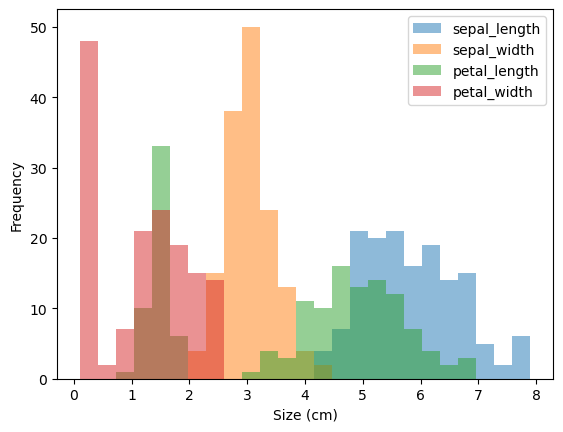

In [12]:
#Overlapped histograms. All in one
ax = df.plot.hist(bins = 25, alpha = .5) # sets the transparency of the different columns
ax.set_xlabel('Size (cm)')

AttributeError: 'Axes' object has no attribute 'is_last_row'

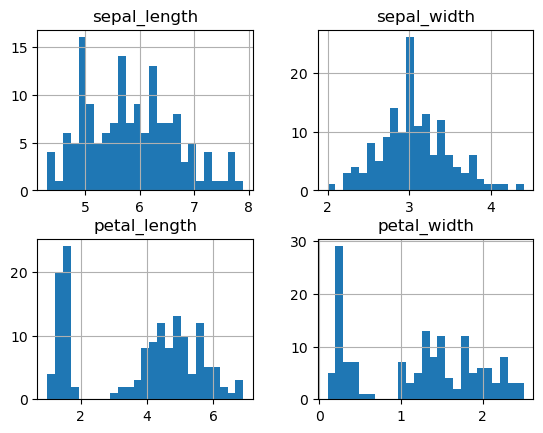

In [11]:
# Separate histograms
axList = df.hist(bins=25)

#adding in x and y labels (this did not work though. I think this needs to be in pandas whoops)
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

/tmp/ipykernel_52437/537145680.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal_length'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_length', ylabel='Density'>

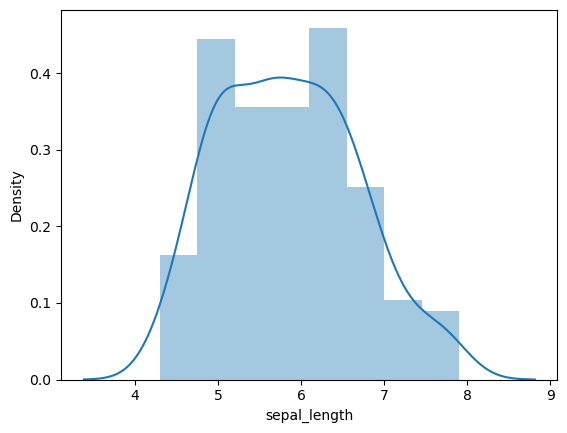

In [16]:
sns.distplot(df['sepal_length'])

### Pair plot
Allows you to see the relationships (correlation) and histograms across every variable/column in the dataset

In [ ]:
sns.pairplot(df, 
             hue = 'species', #specifies which column to color
             size = 3)

### Hex Bin
Gives the density of where the most similar points are being held. Like combining a scatter plot and a histogram. The darker the values, the more common. <br>
Shows the distribution of each variable in addition to seeing where each of those values are most likely to overlap.

In [ ]:
sns.jointplot(x = df['sepal_length'],
             y=df['sepal_width'],
              kind = 'hex')

### Facet Grid

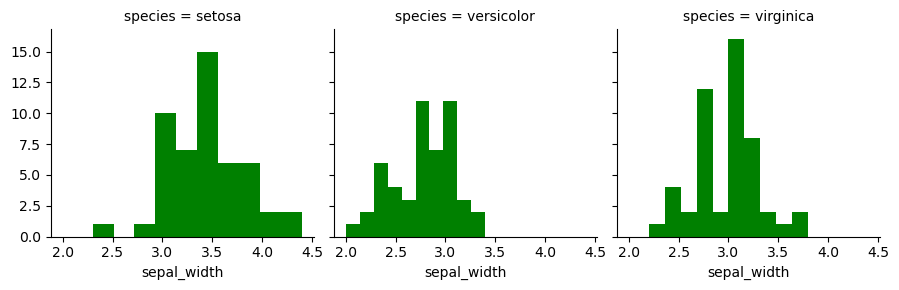

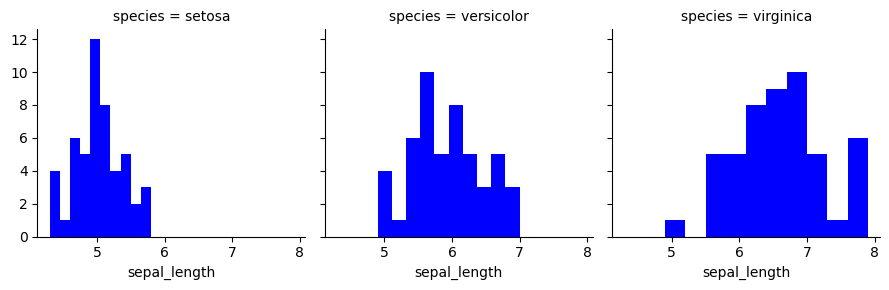

In [9]:
#####First plot
#setting the facet grid  object
plot = sns.FacetGrid(df,
                    col = 'species',
                    margin_titles = True) # have titles for each

#actually plotting the facet grid object. this is necessary to have the plots show up. Like  mapping in a histogram for each of the categories
plot.map(plt.hist, 'sepal_width',color= 'green')

#Second Plot
plot= sns.FacetGrid(df, col = 'species',
                   margin_titles=True)

plot.map(plt.hist, 'sepal_length', color='blue')